# <center> Predicting Sunspots

---
     

**Project Name: Sunspots Prediction using Machine Learning**

---

<center> <img src = "http://i.imgur.com/NVN9eOK.gif?1" width = 55%>
    

## Contents 

**1)** [Understanding Sunspots](#h1)         
**2)** [Exploring the dataset](#h2)      
**3)** [Introducing sequence models for time series data](#h3)          
**4)** [Functions to generate the data for training and predictions](#h4)            
**5)** [Huber Loss](#h6)                 
**6)** [Model building and finding Optimal learning rate](#h7)        
**7)** [Training the model with the optimal learning rate](#h8)       
**8)** [Plots, Results and Predictions](#h9)          
**9)** [Tasks for you](#h10)

# Sunspots<a class="anchor"  id="h1"></a>

<img src = "https://drive.google.com/uc?id=1Ff3eJq1Gybf9AdxKtazDCo_gjJffzkrh" width = 50%> <img src = 'https://www.spaceweather.live/images/help/zonnevlekken/sunspot_penumbra_umbra.jpg' width = 48%>
    
One interesting aspect of the Sun is its sunspots.  Sunspots are areas where the magnetic field is about 2,500 times stronger than Earth's, much higher than anywhere else on the Sun.  Because of the strong magnetic field, the magnetic pressure increases while the surrounding atmospheric pressure decreases.  This in turn lowers the temperature relative to its surroundings because the concentrated magnetic field inhibits the flow of hot, new gas from the Sun's interior to the surface. 

Sunspots tend to occur in pairs that have magnetic fields pointing in opposite directions.  A typical spot consists of a dark region called the umbra, surrounded by a lighter region known as the penumbra.   The sunspots appear relatively dark because the surrounding surface of the Sun (the photosphere) is about 10,000 degrees F., while the umbra is about 6,300 degrees F.  Sunspots are quite large as an average size is about the same size as the Earth.

Sunspots increase and decrease, then again increases and decreases through an average cycle of 11 years.  Solar cycle 1 was the first solar cycle since extensive recording of solar sunspot activity began in 1755 and we have experienced a total of 24 full solar cycles since then. Currently, we are in 25th solar cycle, the solar cycle 25 began in December 2019 and is expected to last till more 11 years that is about 2030.

<u>**Learn more about the Sunspots:-**</u>           
https://www.weather.gov/fsd/sunspots#:~:text=Sunspots%20are%20areas%20where%20the,the%20surrounding%20atmospheric%20pressure%20decreases

<u>**Viewing sunspots using binoculars:-**</u>                        
https://www.youtube.com/watch?v=SXb417JFLlA         
https://www.youtube.com/watch?v=fCnZlH4-6Go          

## Diving into the dataset<a class="anchor"  id="h2"></a>

- Firstly, add this [Sunspots dataset](https://www.kaggle.com/datasets/robervalt/sunspots) to your Kaggle notebook

In [1]:
# Importing necessary libraries

'''Visualization'''
import matplotlib.pyplot as plt
import seaborn as sns

'''Data Handeling and Linear Algebra'''
import pandas as pd
import numpy as np

'''Manipulating Data and Model Building'''
import tensorflow as tf

'''Ignore warnings'''
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Take a look into the data
data=pd.read_csv("../input/sunspots/Sunspots.csv")
data.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [3]:
# Check the last year in the data
data.tail()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
3260,3260,2020-09-30,0.6
3261,3261,2020-10-31,14.4
3262,3262,2020-11-30,34.0
3263,3263,2020-12-31,21.8
3264,3264,2021-01-31,10.4


In [4]:
# General information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3265 non-null   int64  
 1   Date                               3265 non-null   object 
 2   Monthly Mean Total Sunspot Number  3265 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.6+ KB


- Total of 3265 months of data starting from January 1749 till January 2021
- No null values found in the data
- We are all set to extract our sunspots data from this dataframe and visualize it

In [5]:
# Last column ---> Sunspots data
sunspots = data.iloc[:,-1]
sunspots.values

array([ 96.7, 104.3, 116.7, ...,  34. ,  21.8,  10.4])

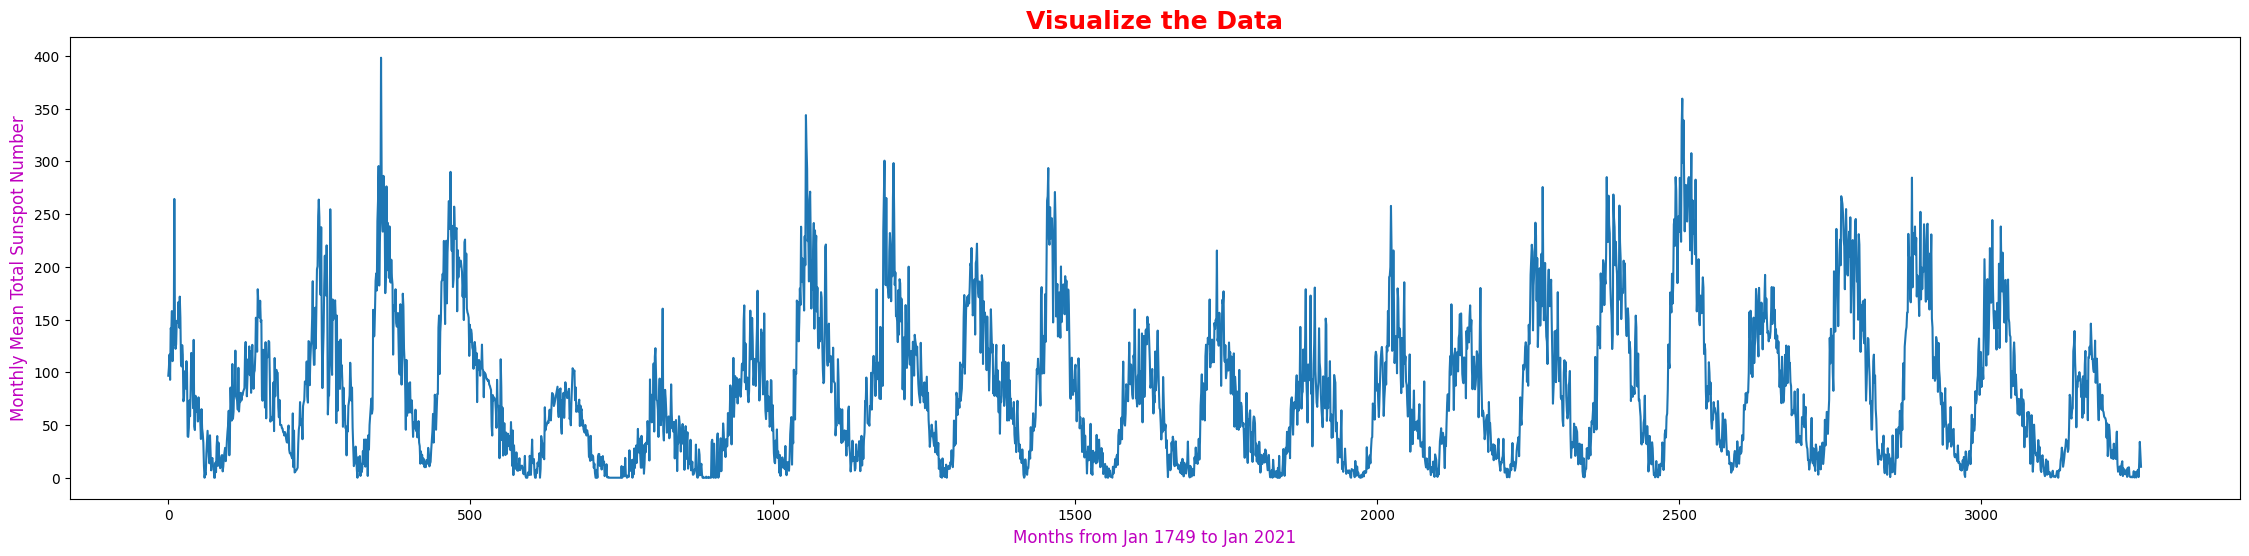

In [6]:
# Visualize the data
plt.figure(figsize=(28,6))
plt.plot(sunspots)
plt.ylabel(data.columns[-1], fontsize = 12, color = 'm')                     
plt.xlabel("Months from Jan 1749 to Jan 2021", fontsize = 12, color = 'm')
plt.title("Visualize the Data", fontsize = 18, color = 'r', weight = 'bold')
plt.show()

Remember,
- The first solar cycle started from 1755 but our sunspots data starts from 1749. That's a total of 6 years which means 72 months of data
- Hence, we can see the initial part of the graph decreasing to minimum till the first 72 months
- Each solar cycle lasts approx 11 years, that is about 132 months
- The current cycle is the solar cycle 25 which began in December 2019 but our data is till January 2021. That's about 13 months of data from the current cycle

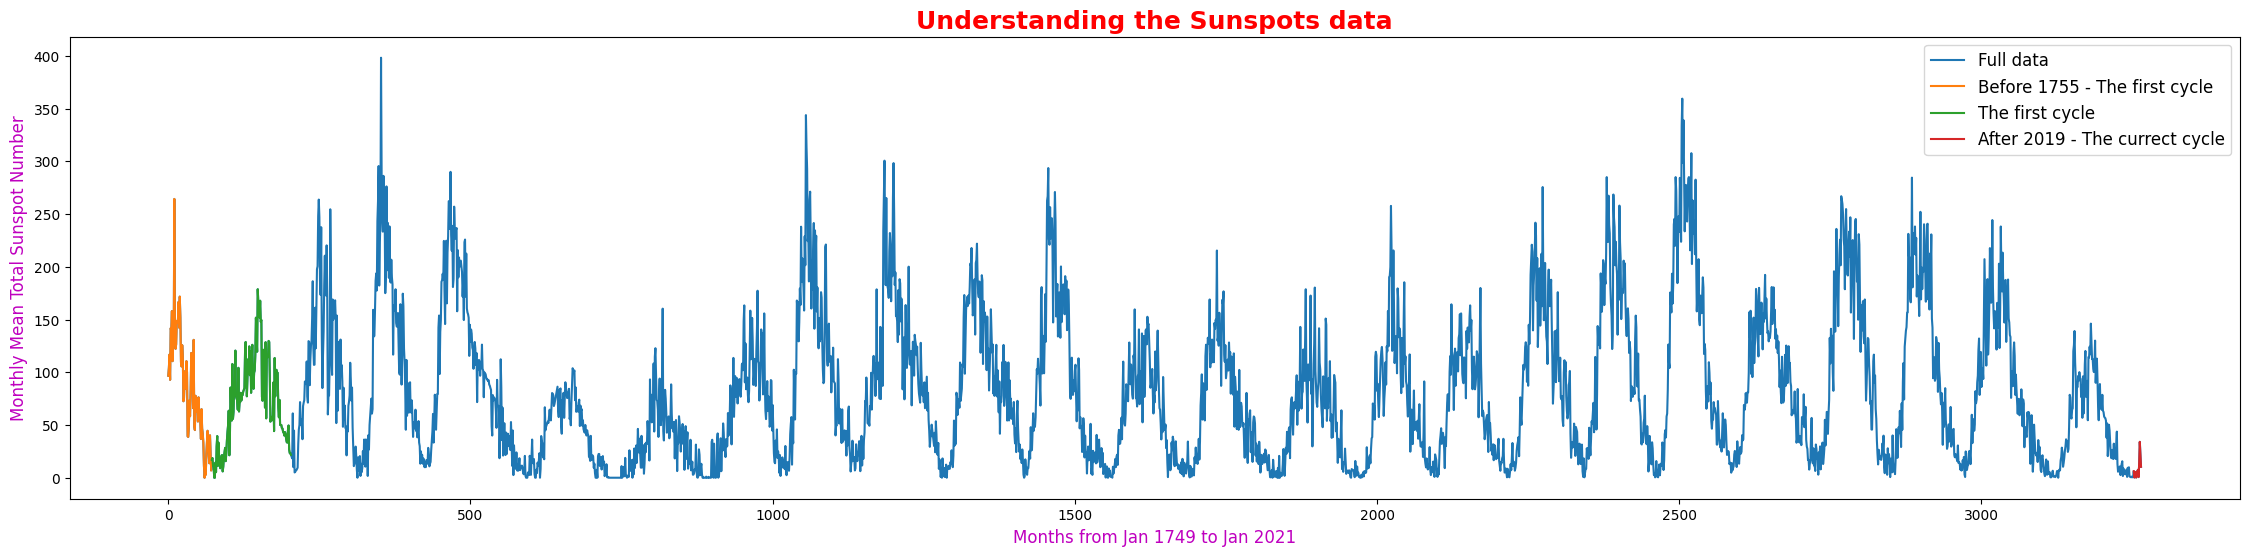

In [7]:
# Highlighting the above points in our visualization
'''Approx 11 years cycle ---> approx 132 months cycle'''
plt.figure(figsize=(28,6))
plt.plot(sunspots)            # The whole data
plt.plot(sunspots[:72])       # Data from 1749, actual cycles started from 1755 --> 6 years means 72 months
plt.plot(sunspots[72:72+132]) # Showing the first cycle 
plt.plot(sunspots[-13:])      # Displaying the current cycle
plt.ylabel(data.columns[-1], fontsize = 12, color = 'm')
plt.xlabel("Months from Jan 1749 to Jan 2021", fontsize = 12, color = 'm')
plt.title("Understanding the Sunspots data", fontsize = 18, color = 'r', weight = 'bold')
plt.legend(["Full data", "Before 1755 - The first cycle", "The first cycle", "After 2019 - The currect cycle"], fontsize = 12)
plt.show()

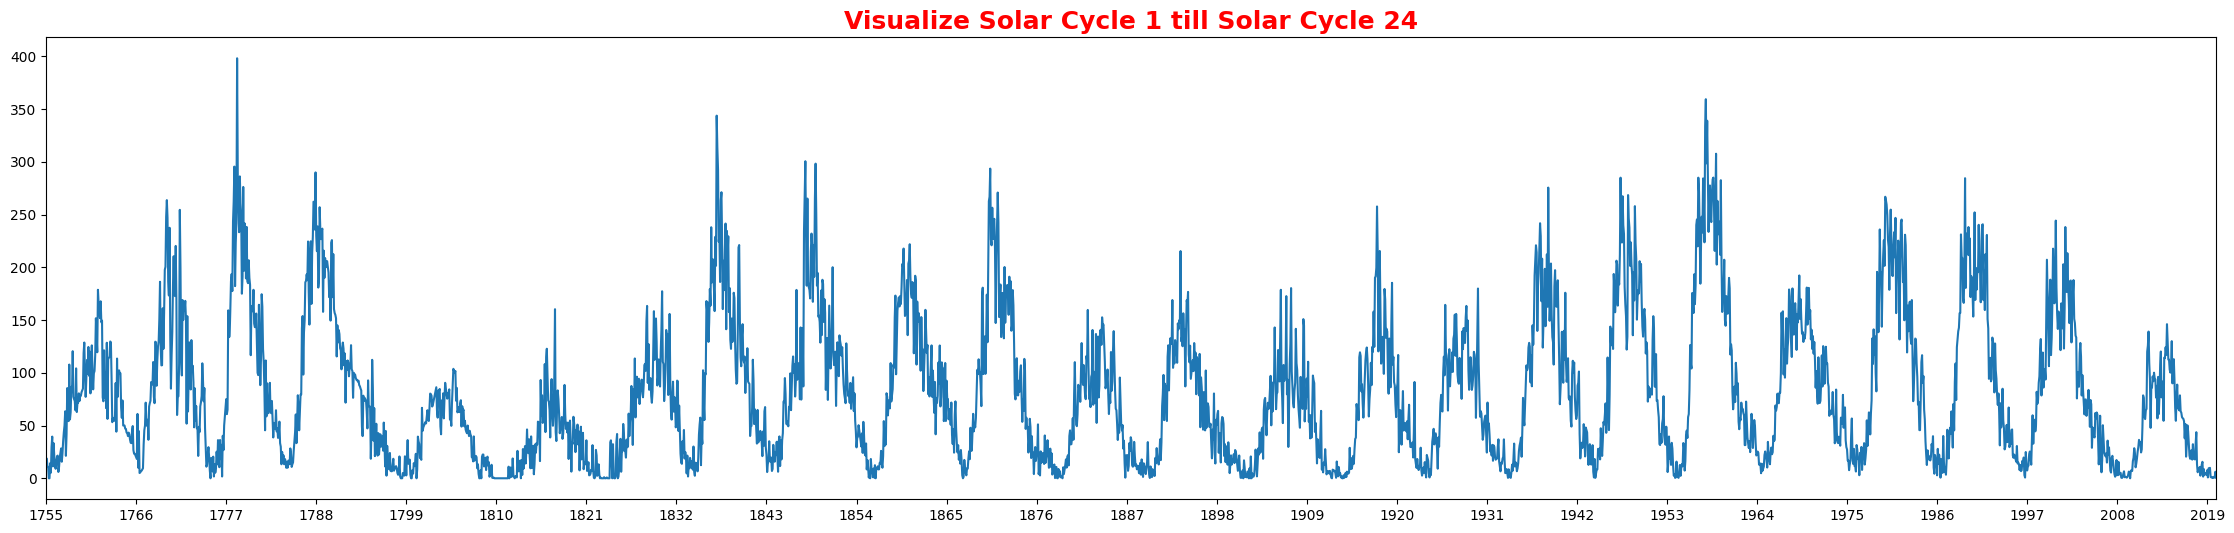

In [8]:
# Some changes for a better visualization of solar cycles
'''Collect all the years from 1755 to 2019 and use it as xticklabels'''
years = []
start = 1755
for i in range(0, len(data.iloc[:,-1][72:]),132):
    years.append(start)
    start+=11

plt.figure(figsize = (28, 6))
plt.plot(sunspots[72:])
plt.title("Visualize Solar Cycle 1 till Solar Cycle 24", weight = 'bold', color = 'r', fontsize = 18)
plt.xlim(72, 3265-12)
plt.xticks(range(72, len(sunspots),132))
plt.gca().set_xticklabels(years)
plt.show()

- Here some data is not exactly as we expected. For example, look at the start of 4th solar cycle
- It actually started in 1784 rather than 1788 and lasted till 1798
- Hence, there is this mismatch. However, now we do understand this data a bit more clearly!
- Note that this is a noisy data! Some cycles have crazy values like around 400 whereas the maximum sunspots ever recorded is 285 in March 1958 (Solar cycle - 19)
- Well, such sequence of data points indexed in time order is referred as the time series data

**There is some [task](#h10) associated with the plots below:-**<a class = 'anchor' id = 'h0'></a>

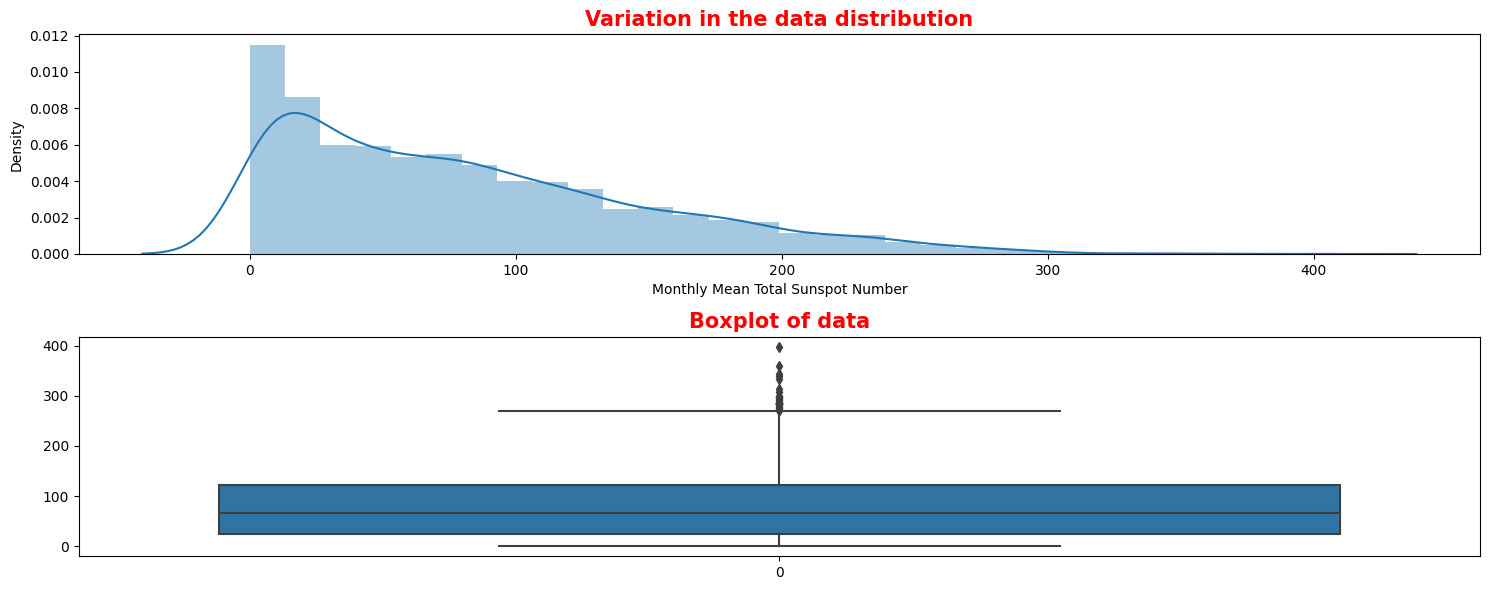

In [9]:
# Visualise the variation in the data distribution along with the outliers in the time series data
plt.figure(figsize = (15,6))
plt.subplot(2, 1, 1)
sns.distplot(sunspots)
plt.title("Variation in the data distribution", fontsize = 15, color = 'r', weight = 'bold')
plt.subplot(2, 1, 2)
sns.boxplot(sunspots)
plt.title("Boxplot of data", fontsize = 15, color = 'r', weight = 'bold')
plt.tight_layout()
plt.show()

## Sequence Models for time series data - RNN, LSTM<a class = 'anchor' id='h3'></a>
- When we want our model to remember information from the past we usually prefer to use - Recurrent Neural Networks
- It has a unique architecture in itself which helps it remember information from the past
- It processes input of sequences such that it always has some information from the past
- Below is an image showing the architecture of a RNN. We can clearly see that the weights from previous layers are shared with the next layers!

<img src = 'https://editor.analyticsvidhya.com/uploads/17464JywniHv.png' width = 75%>

- However, due to sharing of these weights while backpropagating through time these [gradients multiplications](https://drive.google.com/file/d/1Logf56_oxBDaHnlwHC3_Ghd7AVR341Yq/view?usp=share_link) causes high chances of vanishing gradients if any value become smaller
- To overcome this and retain infromation from past for longer period we are choosing LSTM (Long-Short Term Memory). It was constructed specifically to overcome vanishing gradients
- Here, the cell of LSTM is constructed with help of gates such that it can retain information for longer period of time.

**LSTM cell:-**     

<img src = 'https://i.stack.imgur.com/aTDpS.png' width = 60%>

- One of the main disadvantage of using LSTM is that it consumes a lot of memory and time to train
- Hence, a new variant was invented about a decade ago in 2014, Gated Recurrent Unit aka GRU 
- It consists of only two gates which means that overall parameters in the model decreases which in turn decreases the time and memory to train.
- We are directly going to use LSTM for our project as the dataset we are using is small

**RNN, LSTM, and GRU in one frame:-**

<img src = 'https://miro.medium.com/max/720/0*c3WksH9kuFrQy7rz' width = 75%>

[Very detailed explanation on LSTM](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)         
[Extra resource on RNN, LSTM, GRU](https://sh-tsang.medium.com/review-empirical-evaluation-of-gated-recurrent-neural-networks-on-sequence-modeling-gru-2adb86559257)

# Preparing functions for generating sequences of data and forecasting<a class = 'anchor' id = 'h4'></a>

**LSTM expects a 3D input as following:-**
* *(batch size, sequence length, number of features)*  

<img src = 'https://miro.medium.com/max/872/0*o-PhzdP_jd_5L2iq.jpg' width = 55%>







In [13]:
#Helper function: Training data generation
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = series[:, np.newaxis]                                # Adding new dimension to the series array in the position where np.newaxis is written
    ds = tf.data.Dataset.from_tensor_slices(series)               # In order to use window of tensorflow convert numpy array to tensor
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True) # Creating window for generating sequence (yet not seperating it with the future values) - LSTM
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))          # Flatten a dataset of batches into a dataset of their elements
    ds = ds.shuffle(shuffle_buffer)                               # To reduce the variance and making sure that the model remain general and less overfits
    ds = ds.map(lambda w: (w[:-1], w[-1]))                        # In a window, last value is the future value that our model needs to learn and predict while testing it
    return ds.batch(batch_size).prefetch(1)                       # Prefetch one batch of data and make sure that there is always one ready

### Breaking down the above function to understand what exactly is happening!

In [14]:
'''For example take the first 10 examples from the sunspots series'''
dum_series = sunspots[:10].values  # Numpy array 
dum_series, dum_series.shape       # Display array and its shape

(array([ 96.7, 104.3, 116.7,  92.8, 141.7, 139.2, 158. , 110.5, 126.5,
        125.8]),
 (10,))

In [15]:
'''Adding a new dimension in the place where np.axis is used'''
dum_series=dum_series[:, np.newaxis]   # Shape now should be 10x1 
dum_series, dum_series.shape           # Check

(array([[ 96.7],
        [104.3],
        [116.7],
        [ 92.8],
        [141.7],
        [139.2],
        [158. ],
        [110.5],
        [126.5],
        [125.8]]),
 (10, 1))

In [16]:
'''To use the window method of tensorflow to generate the sequence for LSTM we need to generate tensor from the numpy array'''
ds = tf.data.Dataset.from_tensor_slices(dum_series)  # Window method of tensorflow won't work on numpy array

# Display the content of the above dataset
for i in ds:  
    for val in i:
        print(val)

tf.Tensor(96.7, shape=(), dtype=float64)
tf.Tensor(104.3, shape=(), dtype=float64)
tf.Tensor(116.7, shape=(), dtype=float64)
tf.Tensor(92.8, shape=(), dtype=float64)
tf.Tensor(141.7, shape=(), dtype=float64)
tf.Tensor(139.2, shape=(), dtype=float64)
tf.Tensor(158.0, shape=(), dtype=float64)
tf.Tensor(110.5, shape=(), dtype=float64)
tf.Tensor(126.5, shape=(), dtype=float64)
tf.Tensor(125.8, shape=(), dtype=float64)


In [17]:
'''Generate sequence of length 3 ---> Hence prev 3 values will be used to train our model to learn and predict the 4th value'''
window_size = 3                                               # Sequence Length
ds = ds.window(window_size + 1, shift=1, drop_remainder=True) # Drop remainder if True ensures the same shape of the tensor

# Display the changes
for i in ds:
    for val in i:
        print(val)

tf.Tensor([96.7], shape=(1,), dtype=float64)
tf.Tensor([104.3], shape=(1,), dtype=float64)
tf.Tensor([116.7], shape=(1,), dtype=float64)
tf.Tensor([92.8], shape=(1,), dtype=float64)
tf.Tensor([104.3], shape=(1,), dtype=float64)
tf.Tensor([116.7], shape=(1,), dtype=float64)
tf.Tensor([92.8], shape=(1,), dtype=float64)
tf.Tensor([141.7], shape=(1,), dtype=float64)
tf.Tensor([116.7], shape=(1,), dtype=float64)
tf.Tensor([92.8], shape=(1,), dtype=float64)
tf.Tensor([141.7], shape=(1,), dtype=float64)
tf.Tensor([139.2], shape=(1,), dtype=float64)
tf.Tensor([92.8], shape=(1,), dtype=float64)
tf.Tensor([141.7], shape=(1,), dtype=float64)
tf.Tensor([139.2], shape=(1,), dtype=float64)
tf.Tensor([158.], shape=(1,), dtype=float64)
tf.Tensor([141.7], shape=(1,), dtype=float64)
tf.Tensor([139.2], shape=(1,), dtype=float64)
tf.Tensor([158.], shape=(1,), dtype=float64)
tf.Tensor([110.5], shape=(1,), dtype=float64)
tf.Tensor([139.2], shape=(1,), dtype=float64)
tf.Tensor([158.], shape=(1,), dtype=float

In [18]:
'''Flatten the dataset and map the function given in method argument across the dataset'''
ds = ds.flat_map(lambda w: w.batch(window_size + 1)) # Batch of 4 is what we want for this example
ds = ds.map(lambda w: (w[:-1], w[-1]))               # Two different outputs we should get ---> Sequence of 3 and 1 label

# Display the change
for i in ds:
    for val in i:
        print(val)

tf.Tensor(
[[ 96.7]
 [104.3]
 [116.7]], shape=(3, 1), dtype=float64)
tf.Tensor([92.8], shape=(1,), dtype=float64)
tf.Tensor(
[[104.3]
 [116.7]
 [ 92.8]], shape=(3, 1), dtype=float64)
tf.Tensor([141.7], shape=(1,), dtype=float64)
tf.Tensor(
[[116.7]
 [ 92.8]
 [141.7]], shape=(3, 1), dtype=float64)
tf.Tensor([139.2], shape=(1,), dtype=float64)
tf.Tensor(
[[ 92.8]
 [141.7]
 [139.2]], shape=(3, 1), dtype=float64)
tf.Tensor([158.], shape=(1,), dtype=float64)
tf.Tensor(
[[141.7]
 [139.2]
 [158. ]], shape=(3, 1), dtype=float64)
tf.Tensor([110.5], shape=(1,), dtype=float64)
tf.Tensor(
[[139.2]
 [158. ]
 [110.5]], shape=(3, 1), dtype=float64)
tf.Tensor([126.5], shape=(1,), dtype=float64)
tf.Tensor(
[[158. ]
 [110.5]
 [126.5]], shape=(3, 1), dtype=float64)
tf.Tensor([125.8], shape=(1,), dtype=float64)


In [19]:
'''Generate the final dataset for LSTM in shape of batch_size x sequence_length x #features and respective labels'''
ds = ds.batch(10).prefetch(1)  # sequence of length 3 for total of 10 examples means max_batch_size of 10 - 3 = 7 should be there
'''Shape of sequence data will be 7 x 3 x 1 and for labels it will be 7 x 1'''

# Display the final 3D Data
for i in ds:
    for val in i:
        print(val)
    print("\n")

tf.Tensor(
[[[ 96.7]
  [104.3]
  [116.7]]

 [[104.3]
  [116.7]
  [ 92.8]]

 [[116.7]
  [ 92.8]
  [141.7]]

 [[ 92.8]
  [141.7]
  [139.2]]

 [[141.7]
  [139.2]
  [158. ]]

 [[139.2]
  [158. ]
  [110.5]]

 [[158. ]
  [110.5]
  [126.5]]], shape=(7, 3, 1), dtype=float64)
tf.Tensor(
[[ 92.8]
 [141.7]
 [139.2]
 [158. ]
 [110.5]
 [126.5]
 [125.8]], shape=(7, 1), dtype=float64)




In [20]:
# Forecast would work in the same way where we provide the sequence and the output will be predicted by the model
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(batch_size).prefetch(1)
    forecast = model.predict(ds)  # To predict
    return forecast

### Train-Test Split

In [21]:
# Preparing the data
series = data['Monthly Mean Total Sunspot Number'].values
time = data['Unnamed: 0'].values

# Splitting the data into train and test 
split_time = int(len(series)*0.9)          # 90% of the original data is for training
time_train = time[:split_time]              
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
print(f"There are {len(x_train)} training samples and {len(x_valid)} validation samples.")

# Parameters
delta = 1                      # Huber loss
window_size = 60               # For dataset
batch_size = 145               # For dataset
shuffle_buffer_size= 900       # Shuffling the dataset randomly
epochs = 100                   # For optimal learning rate
train_epochs = epochs + 100    # Training epochs
momentum_sgd = 0.9             # For optimizer

There are 2938 training samples and 327 validation samples.


## Huber Loss<a class = 'anchor' id = h6></a>

- *It is a piecewise loss function used in robust regression, that is less sensitive to outliers in data.*      
- *For small values of error ($y - y_p)$, this function is quadratic and linear for larger values.*        
- *We use $\delta$ to determine how small an error can be to consider the quadratic version of loss.*        
- *Any error value greater than $\delta$ would use the linear version of loss.*

**Take a look at how Huber loss is defined and what it looks like when $\delta = 1$:-**        
<img src = 'https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img/https://www.evergreeninnovations.co/wp-content/uploads/2019/01/huber_equation.png' width = 35%>        
<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Huber_loss.svg/600px-Huber_loss.svg.png' width = 35%>

In [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/losses/Huber), the value of $\delta$ is set to 1 by default which you can surely try and change to see how it affects the model performance.

## Build the model and find the best learning rate to optimise model training<a class = 'anchor' id = h7></a>

In [22]:
# To avoid clutter from old models and layers (in case of re-running the notebook without reset and resestart)
tf.keras.backend.clear_session()  

# To produce same sequence of results each time the code runs
tf.random.set_seed(42)
np.random.seed(42)

# Calling the window_dataset function to generate the training data
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

# Building the model
model = tf.keras.models.Sequential([
  # Conv1D layers smoothens out the input time-series so we don't have to add the rolling mean or rolling standard deviation values in the input features
  tf.keras.layers.Conv1D(filters=132, kernel_size=4,strides=1, padding="causal", activation="relu",input_shape=[None, 1]),
  tf.keras.layers.LSTM(256, return_sequences=True), # Return sequence if set to true will return the outputs for each time step as explained above
  tf.keras.layers.LSTM(132, return_sequences=False),# Setting it as False will only output the last time step which will then be feeded into the fully connected layers
  tf.keras.layers.Dense(80, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),                         
  tf.keras.layers.Lambda(lambda x: x * 400)        # To push the values in the range of the original data after getting passed from different activations
]) 

# Display this model summary
model.summary()

# Using callbacks - Learning rate scheduler to find the optimal value to be used in the final model
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20), verbose = 0) # lr --> starting lr * 10^(0/20), starting lr * 10^(1/20), so on.. 

# Stochastic Gradient Desect as the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=momentum_sgd)
model.compile(loss=tf.keras.losses.Huber(delta),
              optimizer=optimizer,
              metrics=["mae"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 132)         660       
                                                                 
 lstm (LSTM)                 (None, None, 256)         398336    
                                                                 
 lstm_1 (LSTM)               (None, 132)               205392    
                                                                 
 dense (Dense)               (None, 80)                10640     
                                                                 
 dense_1 (Dense)             (None, 10)                810       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
 lambda (Lambda)             (None, 1)                 0

In [23]:
history = model.fit(train_set, epochs=epochs, callbacks=[lr_schedule]) # Track the history of training

Epoch 1/100
20/20 [==============================] - 20s 746ms/step - loss: 50.8518 - mae: 51.3496 - lr: 1.0000e-08
Epoch 2/100
20/20 [==============================] - 14s 690ms/step - loss: 43.4798 - mae: 43.9772 - lr: 1.1220e-08
Epoch 3/100
20/20 [==============================] - 14s 692ms/step - loss: 38.2812 - mae: 38.7793 - lr: 1.2589e-08
Epoch 4/100
20/20 [==============================] - 14s 686ms/step - loss: 33.6790 - mae: 34.1764 - lr: 1.4125e-08
Epoch 5/100
20/20 [==============================] - 14s 701ms/step - loss: 30.1658 - mae: 30.6617 - lr: 1.5849e-08
Epoch 6/100
20/20 [==============================] - 14s 693ms/step - loss: 28.0058 - mae: 28.5018 - lr: 1.7783e-08
Epoch 7/100
20/20 [==============================] - 14s 686ms/step - loss: 26.7635 - mae: 27.2590 - lr: 1.9953e-08
Epoch 8/100
20/20 [==============================] - 14s 701ms/step - loss: 26.1088 - mae: 26.6050 - lr: 2.2387e-08
Epoch 9/100
20/20 [==============================] - 14s 685ms/step - lo

In [24]:
# Learning rates used above
lrs = 1e-8 * (10**(np.arange(epochs)/20))
lrs

array([1.00000000e-08, 1.12201845e-08, 1.25892541e-08, 1.41253754e-08,
       1.58489319e-08, 1.77827941e-08, 1.99526231e-08, 2.23872114e-08,
       2.51188643e-08, 2.81838293e-08, 3.16227766e-08, 3.54813389e-08,
       3.98107171e-08, 4.46683592e-08, 5.01187234e-08, 5.62341325e-08,
       6.30957344e-08, 7.07945784e-08, 7.94328235e-08, 8.91250938e-08,
       1.00000000e-07, 1.12201845e-07, 1.25892541e-07, 1.41253754e-07,
       1.58489319e-07, 1.77827941e-07, 1.99526231e-07, 2.23872114e-07,
       2.51188643e-07, 2.81838293e-07, 3.16227766e-07, 3.54813389e-07,
       3.98107171e-07, 4.46683592e-07, 5.01187234e-07, 5.62341325e-07,
       6.30957344e-07, 7.07945784e-07, 7.94328235e-07, 8.91250938e-07,
       1.00000000e-06, 1.12201845e-06, 1.25892541e-06, 1.41253754e-06,
       1.58489319e-06, 1.77827941e-06, 1.99526231e-06, 2.23872114e-06,
       2.51188643e-06, 2.81838293e-06, 3.16227766e-06, 3.54813389e-06,
       3.98107171e-06, 4.46683592e-06, 5.01187234e-06, 5.62341325e-06,
      

In [25]:
# Fetch the optimum learning rate
min_loss = min(history.history['loss'])
idx_min_loss = history.history['loss'].index(min_loss)
opt_lr = lrs[idx_min_loss]
first = str(round(float(str(opt_lr).split('e')[0])))
second = str(opt_lr).split('e')[-1]
final = [first, second]
x = "e".join(final)
x = float(x)
print(f"Optimal Learning Rate was --> {x}.")

Optimal Learning Rate was --> 2e-05.


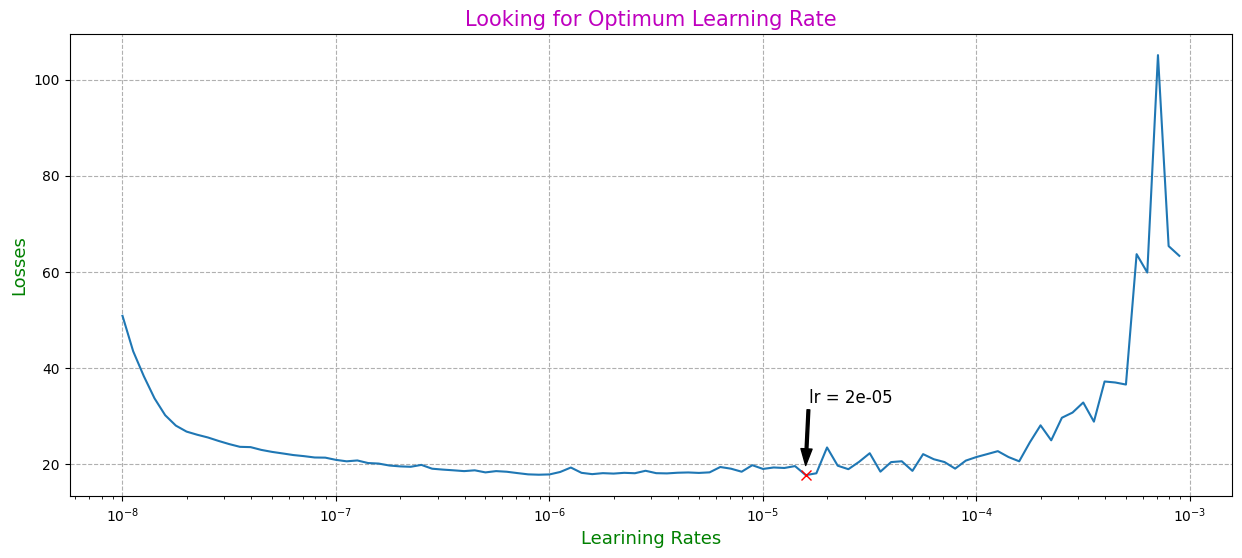

In [26]:
# Plot the output of Losses vs Learning Rates
fig = plt.figure(figsize=(15, 6))
plt.semilogx(lrs, history.history["loss"]) # Learning rates are increasing exponentially and hence for an omptimal sized plot we use semilogx plot
plt.grid(True, ls="--")
plt.plot(opt_lr,min_loss, color = 'r', marker = 'x', markersize = 7)
plt.title(f"Looking for Optimum Learning Rate", color = 'm', fontsize = 15)
plt.ylabel("Losses", fontsize = 13, color = 'g')
plt.xlabel("Learining Rates", fontsize = 13, color = 'g')
plt.annotate(f"lr = {x}", (opt_lr,min_loss+2), (opt_lr+0.05e-5, min_loss+15), arrowprops = dict(facecolor ='k', width = 2, headwidth = 8), fontsize = 12)
plt.show()

## Training the model with the Optimal Learning Rate<a class = 'anchor' id = h8></a>

In [27]:
# Using the same steps to build the model but now with the optimal learning rate to train it
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=132, kernel_size=4,strides=1, padding="causal", activation="relu",input_shape=[None, 1]),
  tf.keras.layers.LSTM(256, return_sequences=True),
  tf.keras.layers.LSTM(132, return_sequences=False),
  tf.keras.layers.Dense(80, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=opt_lr, momentum=momentum_sgd)
model.compile(loss=tf.keras.losses.Huber(delta),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(train_set,epochs=train_epochs)

Epoch 1/200
20/20 [==============================] - 19s 696ms/step - loss: 28.5386 - mae: 29.0334
Epoch 2/200
20/20 [==============================] - 14s 708ms/step - loss: 22.1114 - mae: 22.6061
Epoch 3/200
20/20 [==============================] - 14s 687ms/step - loss: 21.8814 - mae: 22.3753
Epoch 4/200
20/20 [==============================] - 14s 691ms/step - loss: 19.8614 - mae: 20.3536
Epoch 5/200
20/20 [==============================] - 14s 698ms/step - loss: 18.0759 - mae: 18.5665
Epoch 6/200
20/20 [==============================] - 14s 687ms/step - loss: 18.8177 - mae: 19.3091
Epoch 7/200
20/20 [==============================] - 14s 690ms/step - loss: 20.0116 - mae: 20.5060
Epoch 8/200
20/20 [==============================] - 14s 707ms/step - loss: 19.0394 - mae: 19.5313
Epoch 9/200
20/20 [==============================] - 14s 688ms/step - loss: 17.9266 - mae: 18.4187
Epoch 10/200
20/20 [==============================] - 14s 701ms/step - loss: 17.8303 - mae: 18.3231
Epoch 11/

## Plots, Results and Predictions<a class = 'anchor' id = h9></a>

Here we use the mean absolute error as the loss metric, whose mathematical representation is as follows



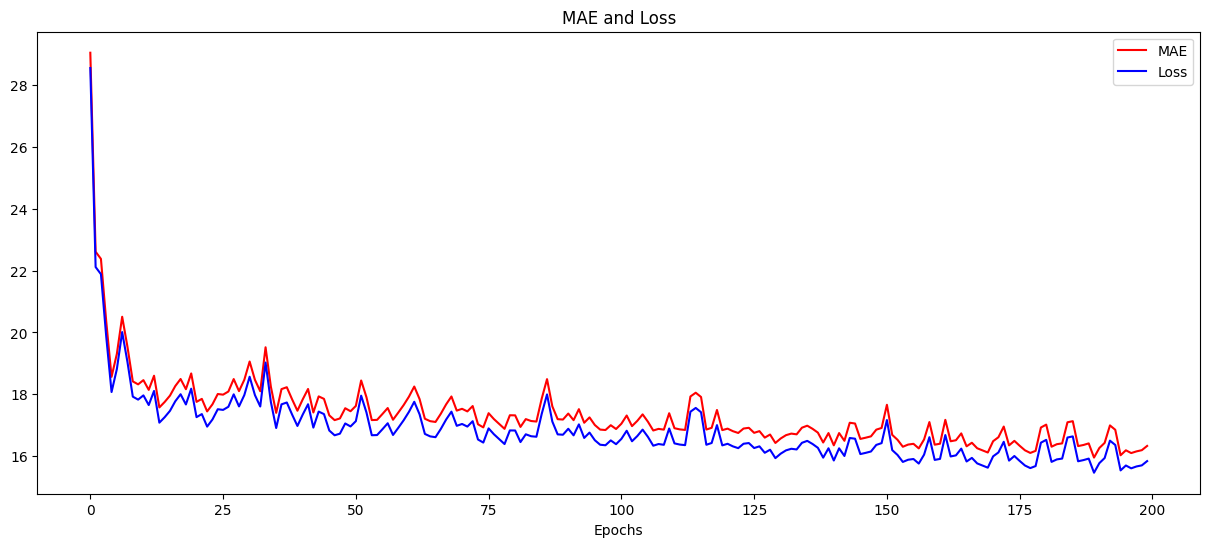

In [28]:
# Fetch the MAE and Huber Loss from the history
mae=history.history['mae']
loss=history.history['loss']

# Plot MAE and Huber Loss
fig = plt.figure(figsize=(15, 6))
plt.plot(mae, 'r')
plt.plot(loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.legend(["MAE", "Loss"])

### Understanding how the model_forecast will work using a dummy data

**data** = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]        
**train_data** = [1, 2, 3, 4, 5, 6, 7]         
**validation_data** = [8, 9, 10]                

**Assuming window size is 4, this is how the forecasting will happen:-**      
**1)** *In order to predict the first value to compare with the first validation data we need values from the training set.*           
**2)** *So we can simply pass in the whole data in the model_forecast function to predict the values based on the window it receieves.*         
**3)** *Starting with [1, 2, 3, 4] the next value will be predicted by the model.*        
**4)** *Sliding the window by one unit, we have [2, 3, 4, 5] which will be used to predict the next value.*        
**5)** *Similarly, we will reach to a stage where our window will have the following values [4, 5, 6, 7] which will the predict the next value which is part of valid data.*    
**6)** *That predicted value and the actual validation data value we can now compare and find huber loss or the mean absolute error.*        
**7)** *At the end, we will have a window of values [7, 8, 9, 10] which will predict a value in fututre whose respective value in the validation data is not avaialable.*      

23/23 [==============================] - 7s 276ms/step


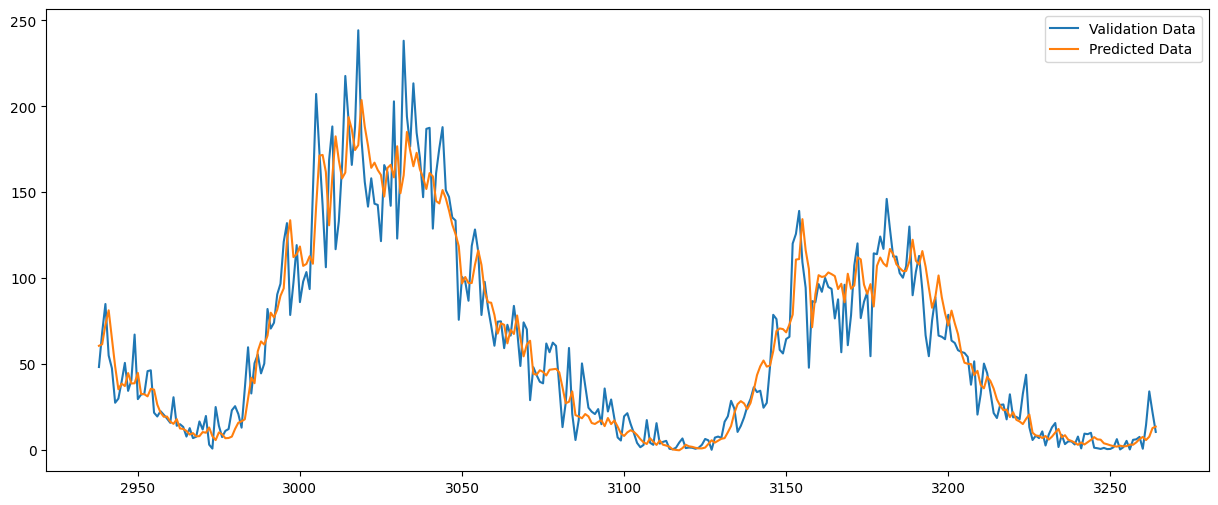

In [29]:
# Call the model_forecast here and display the plots of validation and prediction
rnn_forecast = model_forecast(model, series[:, np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, 0]  # rnn_forecast[-328:-1, 0]

# Plots
plt.figure(figsize=(15, 6))
plt.plot(time_valid, x_valid)
plt.plot(time_valid, rnn_forecast)
plt.title("")
plt.legend(["Validation Data", "Predicted Data"])
plt.show()

In [30]:
# Validation MAE
val_mae=tf.keras.metrics.mae(x_valid, rnn_forecast).numpy()
print(f"MAE on the validation data:- {val_mae}")

MAE on the validation data:- 12.594842910766602


---

# <center> THE END